In [213]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [214]:
def load_dataset(directory):
    subjects = list()
    directory
    for name in os.listdir(directory):
        filename = directory + '/' + name
        if not filename.endswith('.csv'): continue
        df = pd.read_csv(filename, header=None, names=["x", "y", "z", "label"], index_col=0)
        subjects.append(df)
    return subjects

In [215]:
subjects = load_dataset("E:\datasets\HAR")
print(len(subjects[0]))
subjects[0].head()

162501


,x,y,z,label
0.0,1502,2215,2153,1
1.0,1667,2072,2047,1
2.0,1611,1957,1906,1
3.0,1601,1939,1831,1
4.0,1643,1965,1879,1


In [216]:
def plot_subject(df):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

    ax1.plot(df["x"])
    ax2.plot(df["y"])
    ax3.plot(df["z"])
    ax4.plot(df["label"])
        
    plt.show()
      
def plot_seq(seq):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

    ax1.plot(seq[0])
    ax2.plot(seq[1])
    ax3.plot(seq[2])
    ax4.plot(seq[3])
        
    plt.show()

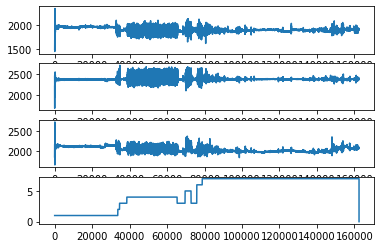

,x,y,z,label
0.0,1502,2215,2153,1
1.0,1667,2072,2047,1
2.0,1611,1957,1906,1
3.0,1601,1939,1831,1
4.0,1643,1965,1879,1


In [252]:
plot_subject(subjects[0])
subjects[0].head()

In [279]:
def subject_to_seq(subject, window_width, seq_len):    
    windows = [subject[i:i+window_width] for i in range(0, len(subject), window_width)]
    if len(windows[-1]) < window_width: windows = windows[:-1] 
    seqs = [np.array(windows[i:i+seq_len]).transpose(0, 2, 1) for i in range(0, len(windows), seq_len)]  
    return seqs

In [280]:
seqs = subject_to_seq(subjects[1].to_numpy(), 52, 25)
print(seqs[0].shape)

(25, 4, 52)


In [283]:
from torch.utils.data import Dataset, DataLoader

class HARDataset(Dataset):
    def __init__(self, subjects, window_width=52, seq_len=25):
        self.subjects = subjects
        self.seq_len = seq_len
        self.window_width = window_width     
        self.seqs = []
        
        for sub in self.subjects:
            self.seqs += subject_to_seq(sub.to_numpy(), window_width, seq_len)
        
    def __len__(self):
        return len(self.seqs)
    
    def __getitem__(self, idx):
        seq = self.seqs[idx]
        return seq[:,:3,:], seq[:,-1,:]

In [289]:
dataset = HARDataset(subjects)
vals, label = dataset[0]

array([[1651, 1632, 1632, 1648, 1643, 1638, 1586, 1578, 1559, 1635, 1671,
        1687, 1704, 1757, 1806, 1814, 1839, 1844, 1929, 1806, 1782, 1775,
        1855, 1893, 1876, 1950, 1811, 1876, 1889, 1883, 1902, 1937, 1978,
        2026, 2066, 2106, 2123, 2052, 2006, 2028, 2034, 1985, 1997, 2069,
        2081, 2105, 2131, 2098, 2127, 2175, 2029, 2191],
       [2188, 2226, 2227, 2226, 2242, 2284, 2279, 2309, 2263, 2300, 2221,
        2237, 2222, 2251, 2220, 2189, 2139, 2134, 2409, 2043, 2541, 2184,
        2142, 2221, 2244, 2319, 2259, 2298, 2297, 2295, 2284, 2275, 2290,
        2295, 2307, 2322, 2323, 2291, 2291, 2332, 2347, 2302, 2323, 2334,
        2327, 2294, 2267, 2254, 2277, 2267, 2174, 2211],
       [1951, 1956, 1990, 1953, 1955, 1966, 1882, 1748, 1978, 2010, 1918,
        1771, 1758, 1849, 1794, 1827, 1882, 1929, 2739, 1799, 2169, 1935,
        1835, 1756, 1747, 1671, 1713, 1680, 1644, 1717, 1773, 1780, 1806,
        1821, 1828, 1826, 1815, 1851, 1840, 1749, 1709, 1755, 1735, 1721

In [ ]:
from torch.utils.data import Dataset

class FFT(object):
    def __call__(self, signal):
        return torch.fft(signal, 1)

In [ ]:
class HARTagger(nn.Module):  
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(HARTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.lstm_x = nn.LSTM(input_dim, hidden_dim)
        self.lstm_y = nn.LSTM(input_dim, hidden_dim)
        self.lstm_z = nn.LSTM(input_dim, hidden_dim)

        self.linear = nn.Linear(hidden_dim*3, output_dim)

    def forward(self, sentence):
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.linear(lstm_out.view(len(sentence), -1))
        return tag_scores